In [1]:
import numpy as np
import pandas as pd
import pickle
from players import Player
import mechs
import utilities
import inequality
np.set_printoptions(precision=3)
from matplotlib import pyplot as plt
from scipy import stats
from itertools import chain
from math import dist

In [2]:
# open a file, where you stored the pickled data
#classes = pd.read_excel('CMData/2015C/2015C.xlsx', names=['id'], usecols='A')
#print(len(classes))

In [3]:
students = pd.read_json('CMData/2015C/instance10.in', lines=True, nrows = 1)['students'][0]
classes = pd.read_json('CMData/2015C/instance10.in', lines=True, nrows = 1)['classes'][0]

In [4]:
util_matrix = {}
n_students = 50
actual_students = len(students)
i = 0
normalize = True

for student in students[:n_students]:
    for idx, preference in enumerate(student['utils']):
        if len(preference) <= 2:
            pass
        else:
            #print('Deleting: ' + str(preference))
            del student['utils'][idx]
    if normalize:
        try:
            normed_utils = np.maximum(student['utils'], np.zeros((len(student['utils']), 2)))
            denom = np.sum(normed_utils[:,1])
            normed_utils[:,1] *= (1. / denom)        
            util_matrix[i] = {}
            for pair in normed_utils:
                util_matrix[i][pair[0]] = pair[1]
            i = i + 1

        except:
            n_students -= 1
    else:
        util_matrix[i] = {}
        for pair in student['utils']:
            util_matrix[i][pair[0]] = max(pair[1], 0)
        i = i + 1
    
df = pd.DataFrame(util_matrix)
#n_classes = len(df)
print(n_students)

38


/tmp/ipykernel_9168/1572089420.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  normed_utils = np.maximum(student['utils'], np.zeros((len(student['utils']), 2)))


In [5]:
n_classes = len(classes)
print(n_students)
print(actual_students)
class_cons = np.empty((n_classes, n_students))
for i, clas in enumerate(classes):

    class_cons[i,:] = np.full((n_students), min(1,  (1. * actual_students) / (clas['capacity'] * n_students)))

38
1674


In [6]:
#varying alpha against loss, gain, ratio, and inequality
num_trials = 10
var = 0.05
alphas = np.arange(0.0,0.51, 0.05)
constrained_lottery = True

player_dict = {}
for (player_id, utils) in df.iteritems():
    player_dict[player_id] = Player(player_id, u_i = utils.values, c_i = 0.1, g = n_classes, n = n_students, U = df.to_numpy().T)

In [7]:
alpha_trial_dict_allocv = {}
alpha_trial_dict_alphas = {}
alpha_trial_dict_allocu = {}
alpha_trial_dict_inequality = {}



#alloc = mechs.usw(player_dict, n_classes)

for alpha in alphas:
    print('Alpha: ' + str(alpha))
    alpha_trial_dict_allocv[alpha] = []
    alpha_trial_dict_allocu[alpha] = []
    alpha_trial_dict_inequality[alpha] = []
    alpha_trial_dict_alphas[alpha] = []
    for trial in range(num_trials):
        alpha_trial_dict_alphas[alpha].append([])
        for idx, player in player_dict.items():
            al = max(np.random.normal(alpha, var), 0.)
            alpha_trial_dict_alphas[alpha][trial].append(al)
            player.setc(al)
            player_dict[idx] = player
        if constrained_lottery:
            alloc_u = mechs.usw_u_classes(player_dict, n_classes, class_cons.T)
            alloc_v = mechs.usw_v_classes(player_dict, n_classes, class_cons.T)
        else:
            alloc_u = mechs.usw(player_dict, n_classes)
            alloc_v = mechs.usw_v(player_dict, n_classes)
        fs_v = inequality.FehrSchmidtIneq(player_dict, alloc_v)
        #print(fs_v)
        #print(mechs.compute_usw(player_dict, alloc_u))
        #print(mechs.compute_usw(player_dict, alloc_v))
        alpha_trial_dict_allocv[alpha].append(alloc_v)
        alpha_trial_dict_allocu[alpha].append(alloc_u)
        alpha_trial_dict_inequality[alpha].append(fs_v)

Alpha: 0.0


KeyboardInterrupt: 

In [9]:
#with open('pickles/alpha_trial_dict_inequality_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_inequality, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/alpha_trial_dict_allocv_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_allocv, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/alpha_trial_dict_allocu_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_allocu, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/alpha_trial_dict_alphas_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_alphas, handle, protocol=pickle.HIGHEST_PROTOCOL)
    



In [7]:
with open('pickles/coursematch/alpha_trial_dict_inequality_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_inequality = pickle.load(handle)
    
with open('pickles/coursematch/alpha_trial_dict_allocv_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_allocv = pickle.load(handle)
    
with open('pickles/coursematch/alpha_trial_dict_allocu_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_allocu = pickle.load(handle)
    
with open('pickles/coursematch/alpha_trial_dict_alphas_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_alphas = pickle.load(handle)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[7.596726795877677, 7.56114116701025, 7.209270010170352, 6.446343392807973, 5.597375760213579, 4.324168038467087, 3.435873557849642, 2.8918421796131133, 2.509702902677207, 1.5709849786883823, 1.0909989019730797]
[0.013294292845804998, 0.009559746108979885, 0.05265533933316835, 0.11607971259013587, 0.10443140333624604, 0.12089489998633425, 0.09000828887666326, 0.03374933484810804, 0.07541181502994339, 0.12101215185238855, 0.059130476349126354]


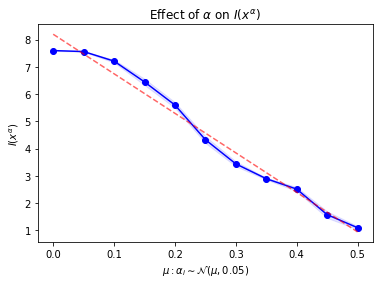

0.9800708112770851


In [8]:
print(alphas)
y = [np.mean(x) for x in alpha_trial_dict_inequality.values()]
print(y)

#some confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in alpha_trial_dict_inequality.values()]
print(ci)

slope, intercept, r_value, p_value, std_err = stats.linregress(alphas, y)
plt.plot(alphas, y, 'bo-')
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)

mn=np.min(alphas)
mx=np.max(alphas)
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x1,y1,'--r',alpha=0.6)
plt.title('Effect of $\\alpha$ on $I(x^\\alpha)$')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$I(x^\\alpha)$')
plt.show()
print(r_value ** 2)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
{0.0: 10, 0.05: 10, 0.1: 10, 0.15000000000000002: 10, 0.2: 10, 0.25: 10, 0.30000000000000004: 10, 0.35000000000000003: 10, 0.4: 10, 0.45: 10, 0.5: 10}
[0.0010467366976454943, 0.0033099854232811927, 0.038576619116639864, 0.14222634804514217, 0.29056536447105186, 0.5701611809923801, 0.8118891433657829, 0.9839962907488383, 1.1318249107919223, 1.5382751425894157, 1.7643478124074776]
[0.0006676453992358977, 0.001501897099931893, 0.006923510789957462, 0.016962965487199586, 0.018066701541699596, 0.03177259842493377, 0.026736068028973936, 0.011514361657845808, 0.03125411058011102, 0.05451011907742351, 0.027801438262584317]


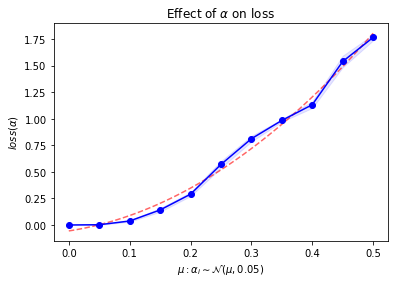

[0.999]
[ 5.678  0.878 -0.055]
0.948232112761063


In [18]:
print(alphas)
print({alpha: len(alpha_trial_dict_allocu[alpha]) for alpha in alphas})
losses = {alpha: [inequality.loss(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i]) for i in range(len(alpha_trial_dict_allocu[alpha]))] for alpha in alphas}
y = [np.mean(x) for x in losses.values()]
print(y)
#some confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in losses.values()]
print(ci)

xlim = [min(alphas), max(alphas)]
params, residuals, rank, singular_values, rcond = np.polyfit(alphas, y, 2, full=True)
x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = params[2] + x_fitted * params[1] + x_fitted**2 * params[0]
plt.plot(x_fitted, y_fitted, 'r--',alpha=0.6)


plt.plot(alphas, y, 'bo-')
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)


plt.title('Effect of $\\alpha$ on loss')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$loss(\\alpha)$')
plt.show()
print(1 - residuals ** 2)
print(params)
slope, intercept, r_value, p_value, std_err = stats.linregress(alphas, y)
print(r_value** 2)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.0017267463520857617, 0.006227685233193192, 0.017350460288659875, 0.057919319005776335, 0.11704985386049334, 0.26567280766973733, 0.47982208857668257, 0.6933029874144008, 0.9427536393453092, 1.251399707256787, 1.5414862712405812]


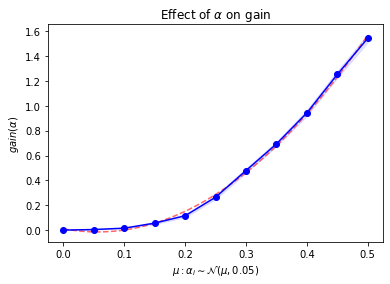

[1.]
[ 8.018 -0.902  0.012]
0.883883875267335


In [19]:
print(alphas)
#print(alpha_trial_dict_allocu)
gains = {alpha: [inequality.gain(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i], alpha_trial_dict_alphas[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
#print([x for x in gains.values()])
y = [np.mean(x) for x in gains.values()]
print(y)

xlim = [min(alphas), max(alphas)]
params, residuals, rank, singular_values, rcond = np.polyfit(alphas, y, 2, full=True)
x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = params[2] + x_fitted * params[1] + x_fitted**2 * params[0]
plt.plot(x_fitted, y_fitted, 'r--',alpha=0.6)


#confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in gains.values()]


plt.plot(alphas, y, 'bo-')
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on gain')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$gain(\\alpha)$')
plt.show()

print(1 - residuals ** 2)
print(params)
slope, intercept, r_value, p_value, std_err = stats.linregress(alphas, y)
print(r_value** 2)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[5.151310130599823, 2.5226356710229214, 0.46523890683736074, 0.41087949409821994, 0.4007021176913816, 0.46725533299237954, 0.591084101209808, 0.704342705941739, 0.8334275780894007, 0.8152447690457804, 0.8738768369914693]
[3.3669260812133586, 0.7136056923098163, 0.0725849110337678, 0.04042968697859785, 0.02677510393657965, 0.024274895420637935, 0.014485753378029403, 0.012912488282639266, 0.01630164005642993, 0.02403759135659837, 0.01608234480548886]


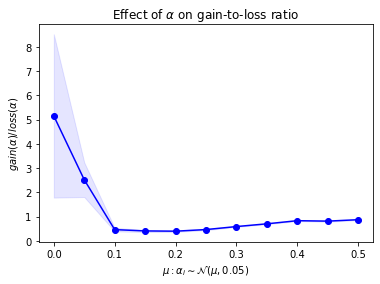

In [21]:
print(alphas)
#print(alpha_trial_dict_allocu)
losses = {alpha: [inequality.loss(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
gains = {alpha: [inequality.gain(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i], alpha_trial_dict_alphas[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
plotter = [[gains[x][i] / losses[x][i] for i in range(len(gains[x]))] for x in losses.keys()]

y = [np.mean(val) for val in plotter]
print(y)

#confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in plotter]
print(ci)

plt.plot(alphas, y, 'bo-')
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on gain-to-loss ratio')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$gain(\\alpha) / loss(\\alpha)$')
plt.show()

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
{0.0: 0.6323693785709232, 0.05: 0.942045300946545, 0.1: 1.4590877584186597, 0.15000000000000002: 2.3021597337964144, 0.2: 3.016810598611539, 0.25: 3.9757791985386093, 0.30000000000000004: 4.315229593769898, 0.35000000000000003: 4.636871137815899, 0.4: 4.814214392791183, 0.45: 5.2342110595900655, 0.5: 5.483488546854754}
[0.6323693785709232, 0.942045300946545, 1.4590877584186597, 2.3021597337964144, 3.016810598611539, 3.9757791985386093, 4.315229593769898, 4.636871137815899, 4.814214392791183, 5.2342110595900655, 5.483488546854754]
[0.13603370347861773, 0.14272065509600246, 0.10737381453529413, 0.13873578035833142, 0.13256325279441336, 0.06882040691392849, 0.05716432330828476, 0.023263574343499988, 0.04313210084054759, 0.04477218547867619, 0.01645619360945771]


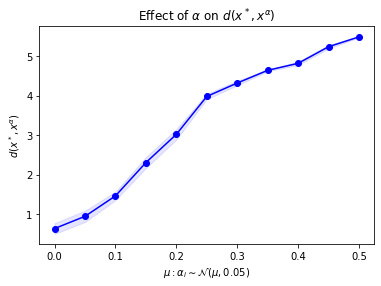

In [22]:

print(alphas)
#print(list(chain(*alpha_trial_dict_allocu[0][0])))
distances = {alpha: [dist(list(chain(*alpha_trial_dict_allocu[alpha][i])), list(chain(*alpha_trial_dict_allocv[alpha][i]))) for i in range(num_trials)] for alpha in alphas}
print({alpha: np.mean(val) for alpha, val in distances.items()})

y = [np.mean(val) for val in distances.values()]
print(y)

#some confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in distances.values()]
print(ci)


plt.plot(alphas, y, 'bo-')
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on $d(x^*, x^\\alpha)$')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$d(x^*, x^\\alpha)$')
plt.show()

In [9]:
def effect_prop_averse(player_dict, alpha_val, n, g, n_trials=1, step=2): 
    data = {'prop cares': [], #'usw alloc u': {}, 'usw alloc v': {}, \
                #'usw u': {}, 'usw v': {}, \
                'usw max util loss' : [], 'usw xstar FS inequality' : [], 'usw xalpha FS inequality' : [] , 'loss' : [], 'gain': [], 'gain to loss' : [], 'distance' : []\
           #'usw max util loss mean' : {}, 'usw xstar FS inequality mean' : {}, 'usw xalpha FS inequality mean' : {} , 'loss mean' : {}, 'gain mean': {}, 'gain to loss mean' : {}\
           }
    
    


    for number in range(0,int(n / step)):
        num_averse = number * step 
        data['prop cares'].append(float(1. * num_averse / n))
        #data['usw alloc u'][num_averse] = []
        data['usw xstar FS inequality'].append([])
        data['usw xalpha FS inequality'].append([])
        data['usw max util loss'].append([])
        data['loss'].append([])
        data['gain'].append([])
        data['gain to loss'].append([])
        data['distance'].append([])
        for trial in range(n_trials):


            for player in range(n):
                player_dict[player].setc(0.)

            for player in range(num_averse):
                player_dict[player].setc(max(np.random.normal(alpha_val, 0.05), 0.))

            # standard allocation setting
            alloc = mechs.usw(player_dict, g)
            #data['usw alloc u'][num_averse].append([alloc])
            data['usw xstar FS inequality'][number].append(inequality.FehrSchmidtIneq(player_dict, alloc))

            # allocations with social preferences
            v_alloc = mechs.usw_v(player_dict, g)
            #data['usw alloc v'].append([v_alloc])
            data['usw xalpha FS inequality'][number].append(inequality.FehrSchmidtIneq(player_dict, v_alloc))


            #compute max utility loss for any individual
            it = utilities.max_util_loss(player_dict, alloc, v_alloc)
            data['usw max util loss'][number].append(it)

            #compute social welfare and price of inequality
            #usw_u = utilities.utilitariansocialwelfare(player_dict, alloc)
            #data['usw u'].append(usw_u)

            #usw_v = utilities.utilitariansocialwelfare(player_dict, v_alloc)
            #data['usw v'].append(usw_v)


            loss = inequality.loss(player_dict, alloc, v_alloc)
            data['loss'][number].append(loss)

            gain = inequality.gain(player_dict, alloc, v_alloc,alphas=None)
            data['gain'][number].append(gain)
            
            distance = dist(list(chain(*alloc)), list(chain(*v_alloc)))
            data['distance'][number].append(gain)

            if num_averse == 0:
                data['gain to loss'][number].append(1.)
            else:
                data['gain to loss'][number].append(gain / (1.0 * loss))


        #data['usw max util loss mean'][num_averse] = np.mean(data['usw max util loss'][num_averse])
        #data['usw xalpha FS inequality mean'][num_averse] = np.mean(data['usw xalpha FS inequality'][num_averse])
        #data['usw max util loss mean'][num_averse]= np.mean(data['usw max util loss'][num_averse])
        #data['loss mean'][num_averse] = np.mean(data['loss'][num_averse])
        #data['gain mean'][num_averse] = np.mean(data['gain'][num_averse])
        #data['gain to loss mean'][num_averse] = np.mean(data['gain to loss'][num_averse])

    df = pd.DataFrame(data=data)
    return df

dfs = {}
alpha_vals = [0.05, 0.15, 0.3, 0.5, 1.]

for av in alpha_vals:
    print(av)
    dfs[av] = effect_prop_averse(player_dict, av, n_students, n_classes, n_trials = 5, step=4)


#plottyplot(dfs, alpha_vals, 'usw xalpha FS inequality', '$I(x^\\alpha)$', 'Effect of proportion of inequality-averse agents on $I(x^\\alpha)$', 'figs/coursematch/effect_propaverse_inequality_test.png',location='lower left')
#plottyplot(dfs, alpha_vals, 'loss', '$loss(\\alpha)$', 'Effect of proportion of inequality-averse agents on $loss(\\alpha)$', 'figs/coursematch/effect_propaverse_loss_test.png', location='upper left')
#plottyplot(dfs, alpha_vals, 'gain', '$gain(\\alpha)$', 'Effect of proportion of inequality-averse agents on $gain(\\alpha)$', 'figs/coursematch/effect_propaverse_gain_test.png', location='upper left')
#plottyplot(dfs, alpha_vals, 'gain to loss', '$gain-to-loss(\\alpha)$', 'Effect of proportion of inequality-averse agents on $gain:loss(\\alpha)$', 'figs/coursematch/effect_propaverse_glratio_test.png', location='upper right')
#plottyplot(dfs, alpha_vals, 'usw max util loss', '$IT(\\alpha)$', 'Effect of proportion of inequality-averse agents on $IT(\\alpha)$', 'figs/coursematch/effect_propaverse_it_test.png', location='upper left')
    


0.05
0.15
0.3
0.5
1.0


In [10]:
def plottyplot(dfs, alpha_vals, y, y_label, plot_title, filename,location='upper right'):
    ## Printing plots! :upside down smiling face:
    color_list = ['red', 'blue', 'black', 'orange', 'pink']
    colors = {key: color_list[i] for i, key in enumerate(alpha_vals)}
    label_list = ['$\\mu = $' + str(av)for av in alpha_vals]
    labels = {key: label_list[i] for i, key in enumerate(alpha_vals)}
    
    plt.figure()
    for j, av in enumerate(alpha_vals):
        why = [np.mean(list(dfs[av][y][num])) for num in range(len(list(dfs[av][y])))]
        plt.plot(list(dfs[av]['prop cares']), why, color=colors[av], ls='-', label=labels[av])
        conf_int = [1.96 * np.std(list(dfs[av][y][num])) / np.sqrt(len(list(dfs[av][y][num]))) for num in range(len(list(dfs[av][y])))]
        plt.fill_between(list(dfs[av]['prop cares']), ([why[i] - conf_int[i] for i in range(len(why))]), ([why[i] + conf_int[i] for i in range(len(why))]), color=colors[av], alpha=.1)
        plt.title(plot_title)
        plt.xlabel('Proportion $p$ of inequality-averse agents')
        plt.ylabel(y_label)
        plt.legend(loc=location)
    plt.show()
    plt.savefig(filename)


In [18]:
with open('pickles/coursematch/propaverse_multitrials.pickle', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
#with open('pickles/coursematch/propaverse_multitrials.pickle', 'rb') as handle:
#    dfs = pickle.load(handle)

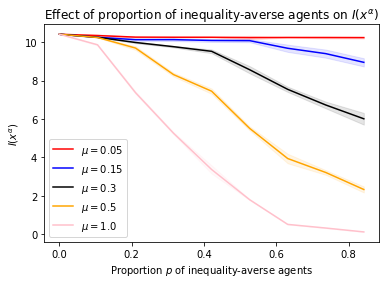

<Figure size 432x288 with 0 Axes>

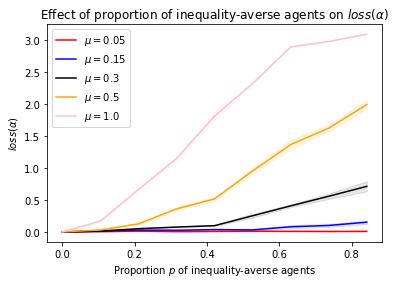

<Figure size 432x288 with 0 Axes>

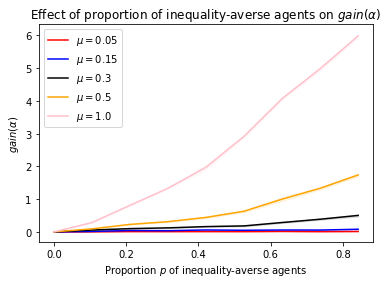

<Figure size 432x288 with 0 Axes>

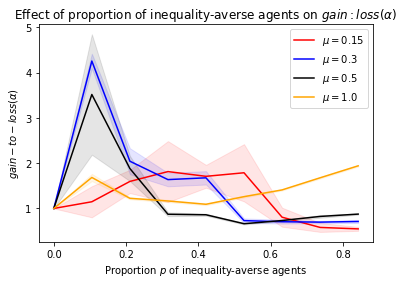

<Figure size 432x288 with 0 Axes>

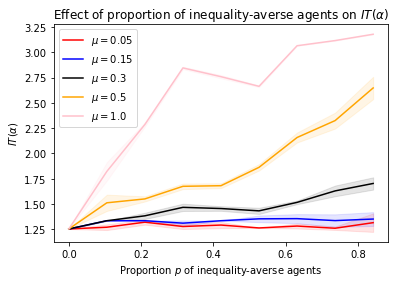

<Figure size 432x288 with 0 Axes>

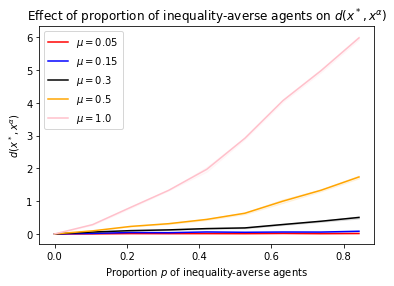

<Figure size 432x288 with 0 Axes>

In [17]:
plottyplot(dfs, alpha_vals, 'usw xalpha FS inequality', '$I(x^\\alpha)$', 'Effect of proportion of inequality-averse agents on $I(x^\\alpha)$', 'figs/coursematch/effect_propaverse_inequality_test.png',location='lower left')
plottyplot(dfs, alpha_vals, 'loss', '$loss(\\alpha)$', 'Effect of proportion of inequality-averse agents on $loss(\\alpha)$', 'figs/coursematch/effect_propaverse_loss_test.png', location='upper left')
plottyplot(dfs, alpha_vals, 'gain', '$gain(\\alpha)$', 'Effect of proportion of inequality-averse agents on $gain(\\alpha)$', 'figs/coursematch/effect_propaverse_gain_test.png', location='upper left')
plottyplot(dfs, alpha_vals[1:], 'gain to loss', '$gain-to-loss(\\alpha)$', 'Effect of proportion of inequality-averse agents on $gain:loss(\\alpha)$', 'figs/coursematch/effect_propaverse_glratio_test.png', location='upper right')
plottyplot(dfs, alpha_vals, 'usw max util loss', '$IT(\\alpha)$', 'Effect of proportion of inequality-averse agents on $IT(\\alpha)$', 'figs/coursematch/effect_propaverse_it_test.png', location='upper left')
#plottyplot(dfs, alpha_vals, 'usw max util loss', '$IT(\\alpha)$', 'Effect of proportion of inequality-averse agents on $IT(\\alpha)$', 'figs/coursematch/effect_propaverse_it_test.png', location='upper left')
plottyplot(dfs, alpha_vals, 'distance', '$d(x^*, x^\\alpha)$', 'Effect of proportion of inequality-averse agents on $d(x^*, x^\\alpha)$', 'figs/coursematch/effect_propaverse_distance_test.png', location='upper left')
